**Note:** This project was developed and tested using **Python 3.x** and **NumPy version 1.26** in a **virtual environment (venv)** because some libraries used were incompatible with the latest NumPy version at the time. Please ensure compatible versions are installed to avoid unexpected errors during execution.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Loading data</h2>

In [2]:
df=pd.read_excel('ct_dataset.xlsx',sheet_name='Sheet1')
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2.0,2010-12-09 20:01:00,1.95,17530.0,United Kingdom
525461,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
525462,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN


In [3]:
df_future=pd.read_excel('ct_dataset.xlsx',sheet_name='Sheet2')

In [4]:
df_future.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10 09:33:00,1.25,15805.0,United Kingdom
1,538172,79321,CHILLI LIGHTS,8,2010-12-10 09:33:00,4.95,15805.0,United Kingdom
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10 09:33:00,2.55,15805.0,United Kingdom
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10 09:33:00,2.95,15805.0,United Kingdom
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10 09:33:00,0.55,15805.0,United Kingdom


Loaded two datasets:
- **Sheet1:** Past transactions for feature engineering.
- **Sheet2:** Future transactions used to calculate the actual CLV (Future_Monetary) as the prediction target.

<h2>Exploratory Data Analysis</h2>

In [5]:
df.shape

(525463, 8)

In [6]:
df_future.shape

(519387, 8)

In [7]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525463 entries, 0 to 525462
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  float64       
 4   InvoiceDate  525462 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 32.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525462,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:38:02.473708800,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


<p>The dataset contains negative values in the Quantity column, which represent returns, as indicated by the corresponding Invoice values starting with 'C' as mentioned in the dataset description. For the Price column we will further inquire it.</p>

In [10]:
(df['Price']<0).value_counts()

Price
False    525460
True          3
Name: count, dtype: int64

In [11]:
(df['Quantity']<0).value_counts()

Quantity
False    513137
True      12326
Name: count, dtype: int64

In [12]:
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12.0,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6.0,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4.0,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6.0,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12.0,2009-12-01 10:33:00,2.95,16321.0,Australia


In [13]:
df[df['Price']<0.0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1.0,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1.0,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1.0,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


<p> Rows with negative Quantity have InvoiceNo starting with 'C', indicating cancellations/returns, so we’ll keep them.
For negative Price, only 3 rows exist with InvoiceNo starting with 'A' and description "Adjust bad debt" — these are accounting entries rather than customer transaction, so we’ll drop them.</p>

In [14]:
df=df[~df['Invoice'].str.startswith('A',na=False)]

In [15]:
df[df['Price']<0.0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [16]:
df.isnull().sum()

Invoice             2
StockCode           2
Description      2930
Quantity            2
InvoiceDate         1
Price               2
Customer ID    107926
Country             2
dtype: int64

<p>As more than 100000 entries have 'Customer ID' missing and our goal is to predict customer lifetime value these entries won't map to particular customer and will not contribute meaningfully to the analysis. Hence, we will remove them.</p>

In [17]:
df.dropna(inplace=True)

In [18]:
df_future.dropna(inplace=True)

In [19]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [20]:
df.shape

(417534, 8)

In [21]:
df['Customer ID'].nunique()

4383

In [22]:
df['Invoice'].nunique()

23587

In [23]:
df['Invoice'].str.startswith('C').sum()

9839

In [24]:
df['StockCode'].nunique()

4031

We found:- 
<li> 4,383 unique customers</li>
<li>23,587 unique invoices (9,839 of which are cancellations)</li>
<li>4,031 unique products</li>

<h2>Feature Engineering</h2>

<p>Starting with calculating the total amount spent per transaction to understand each customer's actual contribution to their CLV.</p>

In [25]:
df['Total']=df['Quantity']*df['Price']

In [26]:
df_future['Total']=df_future['Quantity']*df_future['Price']

In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


<p>To predict Customer Lifetime Value, we need to capture customer purchasing behavior in a structured format.
<br>We apply the RFM framework, which summarizes:
<li>Recency: How recently a customer made their last purchase</li>
<li>Frequency: How often the customer made purchases</li>
<li>Monetary: How much the customer has spent in total</li>
These metrics are calculated at the customer level, transforming our transaction-level dataset into a customer-centric view, suitable for predictive modeling.
</p>

In [28]:
monetary=df.groupby('Customer ID')['Total'].sum()
monetary=monetary.rename('Monetary')

In [29]:
monetary[13085.0]

1187.08

In [30]:
frequency=df.groupby('Customer ID')['Invoice'].nunique()
frequency = frequency.rename('Frequency')

In [31]:
frequency[13085.0]

7

In [32]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
recency=df.groupby('Customer ID')['InvoiceDate'].max().apply(lambda x:(ref_date-x).days)
recency = recency.rename('Recency')
ref_date

Timestamp('2010-12-10 20:01:00')

In [33]:
recency[13085.0]

56

In [34]:
country = df.groupby('Customer ID')['Country'].first()

In [35]:
rfm=pd.concat([recency,frequency,monetary,country],axis=1)
rfm.reset_index(inplace=True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Country
0,12346.0,67,15,-64.68,United Kingdom
1,12347.0,3,2,1323.32,Iceland
2,12348.0,74,1,222.16,Finland
3,12349.0,43,4,2646.99,Italy
4,12351.0,11,1,300.93,Unspecified


In [36]:
future = df_future.groupby('Customer ID').agg({
    'Total': 'sum'
}).reset_index()

future.columns = ['Customer ID', 'Future_Monetary']
rfm = pd.merge(rfm, future, on='Customer ID').dropna()

Added `Future_Monetary` for each customer by aggregating the second dataset — this serves as the actual CLV target to train models on.


In [37]:
rfm['a']=rfm['Recency'] * rfm['Frequency']
rfm['b']= rfm['Frequency'] / rfm['Recency'] 
rfm['c']=rfm['Monetary']*rfm['Monetary']

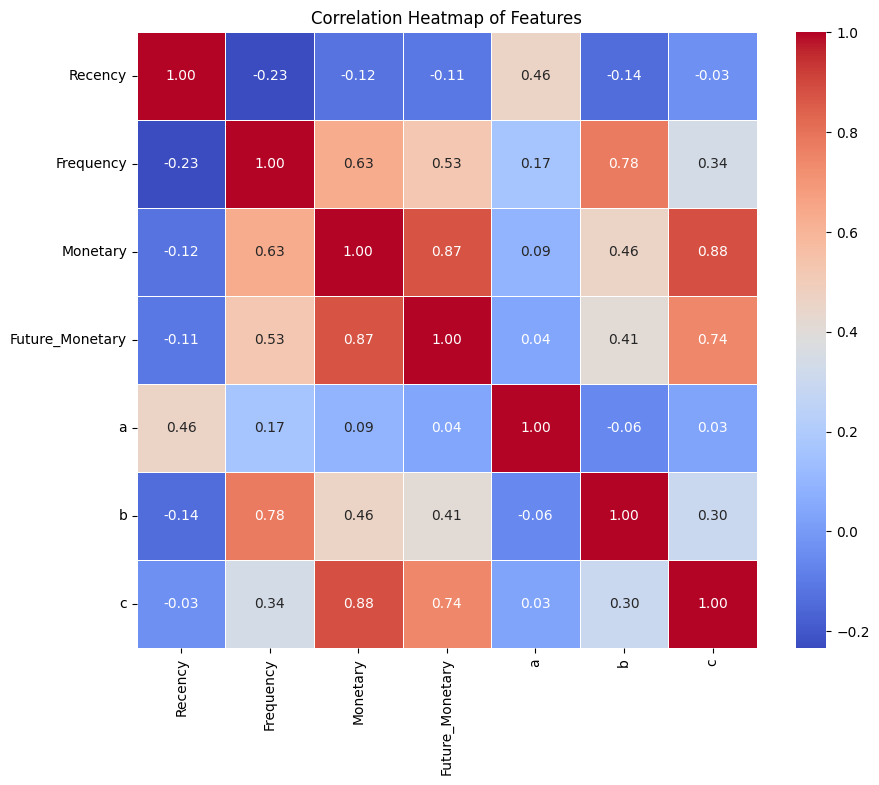

In [38]:
corr = rfm.drop(['Customer ID','Country'], axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.title("Correlation Heatmap of Features")
plt.show()

The heatmap shows that the strongest predictors for Future_Monetary are the original Monetary value and engineered feature `c` (Monetary squared), validating that past spend is the main driver of CLV in this dataset.


In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      2737 non-null   float64
 1   Recency          2737 non-null   int64  
 2   Frequency        2737 non-null   int64  
 3   Monetary         2737 non-null   float64
 4   Country          2737 non-null   object 
 5   Future_Monetary  2737 non-null   float64
 6   a                2737 non-null   int64  
 7   b                2737 non-null   float64
 8   c                2737 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 192.6+ KB


In [40]:
rfm.describe()

,Customer ID,Recency,Frequency,Monetary,Future_Monetary,a,b,c
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2.737000e+03
mean,15335.531969,61.763610,7.150530,2689.731144,2390.893651,227.189258,1.550845,1.193670e+08
std,1702.066589,75.196633,12.192414,10591.191420,9842.054627,298.016113,8.559479,2.641243e+09
min,12346.000000,1.000000,1.000000,-1144.730000,-4287.630000,1.000000,0.002674,0.000000e+00
25%,13874.000000,12.000000,2.000000,469.780000,325.960000,56.000000,0.034091,2.226330e+05
50%,15339.000000,32.000000,4.000000,1069.230000,797.070000,136.000000,0.125000,1.145221e+06
75%,16814.000000,74.000000,8.000000,2353.340000,2043.720000,294.000000,0.571429,5.538209e+06
max,18287.000000,374.000000,270.000000,341776.730000,279489.020000,7049.000000,270.000000,1.168113e+11


<p>Verified the final RFM dataset. Each row represents one customer with their Recency, Frequency, and Monetary value features, ready for CLV modeling.</p>

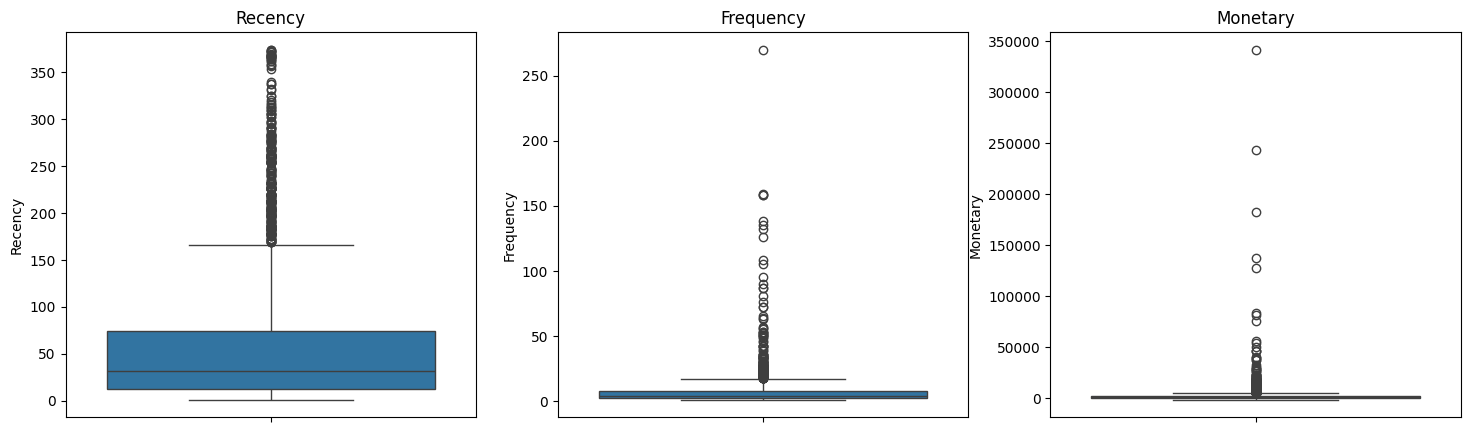

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=rfm['Recency'], ax=axes[0])
axes[0].set_title('Recency')

sns.boxplot(y=rfm['Frequency'], ax=axes[1])
axes[1].set_title('Frequency')

sns.boxplot(y=rfm['Monetary'], ax=axes[2])
axes[2].set_title('Monetary')

plt.show()

<p>Checking the distribution of Recency, Frequency, and Monetary to identify possible outliers that may affect the model.</p>

<p>RFM boxplots show that most customers purchased recently, bought few times, and spent small amounts, but there are clear outliers indicating a few loyal and high-spending customers who will heavily influence overall CLV.</p>


In [42]:
# Use quantiles to score
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Total RFM Score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
rfm.head()


,Customer ID,Recency,Frequency,Monetary,Country,Future_Monetary,a,b,c,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,67,15,-64.68,United Kingdom,0.00,1005,0.223881,4.183502e+03,2,5,1,8
1,12347.0,3,2,1323.32,Iceland,3598.21,6,0.666667,1.751176e+06,5,1,3,9
2,12348.0,74,1,222.16,Finland,1797.24,74,0.013514,4.935507e+04,2,1,1,4
3,12349.0,43,4,2646.99,Italy,1757.55,172,0.093023,7.006556e+06,3,3,4,10
4,12352.0,11,2,343.80,Norway,1545.41,22,0.181818,1.181984e+05,4,1,1,6


<p>Assigning scores from 1–5 for Recency, Frequency, and Monetary based on quintiles, then combining them into an overall RFM Score for segmentation.</p>


In [43]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Country,Future_Monetary,a,b,c,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,67,15,-64.68,United Kingdom,0.00,1005,0.223881,4.183502e+03,2,5,1,8
1,12347.0,3,2,1323.32,Iceland,3598.21,6,0.666667,1.751176e+06,5,1,3,9
2,12348.0,74,1,222.16,Finland,1797.24,74,0.013514,4.935507e+04,2,1,1,4
3,12349.0,43,4,2646.99,Italy,1757.55,172,0.093023,7.006556e+06,3,3,4,10
4,12352.0,11,2,343.80,Norway,1545.41,22,0.181818,1.181984e+05,4,1,1,6


In [44]:
basket_size = df.groupby(['Customer ID', 'Invoice']).size().reset_index(name='ProductsPerBasket')
avg_basket_size = basket_size.groupby('Customer ID')['ProductsPerBasket'].mean().reset_index(name='AvgBasketSize')
rfm= rfm.merge(avg_basket_size, on='Customer ID', how='left')

In [45]:
avg_spending = df.groupby('Customer ID')['Total'].mean().reset_index(name='AvgSpending')
rfm = rfm.merge(avg_spending, on='Customer ID', how='left')

In [46]:
unique_products = df.groupby('Customer ID')['StockCode'].nunique().reset_index(name='UniqueProductsBought')
rfm = rfm.merge(unique_products, on='Customer ID', how='left')

To enrich the RFM base, calculated:
- **Average Basket Size**: Typical number of products per invoice.
- **Average Spending**: Mean spend per transaction.
- **Unique Products Bought**: Product diversity per customer.

These aim to capture extra behavior signals for CLV.

In [47]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Country,Future_Monetary,a,b,c,R_Score,F_Score,M_Score,RFM_Score,AvgBasketSize,AvgSpending,UniqueProductsBought
0,12346.0,67,15,-64.68,United Kingdom,0.00,1005,0.223881,4.183502e+03,2,5,1,8,3.066667,-1.406087,29
1,12347.0,3,2,1323.32,Iceland,3598.21,6,0.666667,1.751176e+06,5,1,3,9,35.500000,18.638310,70
2,12348.0,74,1,222.16,Finland,1797.24,74,0.013514,4.935507e+04,2,1,1,4,20.000000,11.108000,20
3,12349.0,43,4,2646.99,Italy,1757.55,172,0.093023,7.006556e+06,3,3,4,10,26.750000,24.738224,92
4,12352.0,11,2,343.80,Norway,1545.41,22,0.181818,1.181984e+05,4,1,1,6,9.000000,19.100000,18


<p>Visualizing the distribution of customer segments to understand the proportion of high, medium, and low value customers.</p>


In [48]:
rfm['Country'].unique()
rfm_encoded = pd.get_dummies(rfm, columns=['Country'], drop_first=True)
rfm_encoded.head()

,Customer ID,Recency,Frequency,Monetary,Future_Monetary,a,b,c,R_Score,F_Score,...,Country_Poland,Country_Portugal,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,67,15,-64.68,0.00,1005,0.223881,4.183502e+03,2,5,...,False,False,False,False,False,False,False,False,True,False
1,12347.0,3,2,1323.32,3598.21,6,0.666667,1.751176e+06,5,1,...,False,False,False,False,False,False,False,False,False,False
2,12348.0,74,1,222.16,1797.24,74,0.013514,4.935507e+04,2,1,...,False,False,False,False,False,False,False,False,False,False
3,12349.0,43,4,2646.99,1757.55,172,0.093023,7.006556e+06,3,3,...,False,False,False,False,False,False,False,False,False,False
4,12352.0,11,2,343.80,1545.41,22,0.181818,1.181984e+05,4,1,...,False,False,False,False,False,False,False,False,False,False


Country was one-hot encoded to convert the categorical variable into numeric features for modeling.

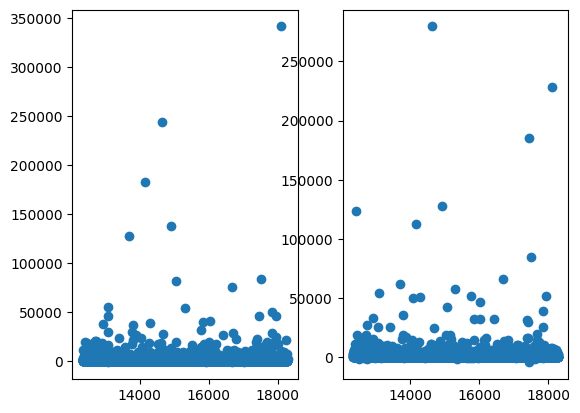

In [49]:
plt.subplot(1,2,1)
plt.scatter(rfm['Customer ID'],rfm['Monetary'])
plt.subplot(1,2,2)
plt.scatter(rfm['Customer ID'],rfm['Future_Monetary'])
plt.show()

In [50]:
for col in rfm_encoded.columns:
    if rfm_encoded[col].dtype == 'bool' or rfm_encoded[col].dtype == 'object':
        rfm_encoded[col] = rfm_encoded[col].astype(int)
rfm_encoded.dtypes

Customer ID                      float64
Recency                            int64
Frequency                          int64
Monetary                         float64
Future_Monetary                  float64
a                                  int64
b                                float64
c                                float64
R_Score                         category
F_Score                         category
M_Score                         category
RFM_Score                          int64
AvgBasketSize                    float64
AvgSpending                      float64
UniqueProductsBought               int64
Country_Austria                    int32
Country_Bahrain                    int32
Country_Belgium                    int32
Country_Channel Islands            int32
Country_Cyprus                     int32
Country_Denmark                    int32
Country_EIRE                       int32
Country_Finland                    int32
Country_France                     int32
Country_Germany 

<p></p>

<h2>Model Training and Evaluation</h2>

<p>In this section, we create two different sets of input features to compare how different combinations affect our prediction results.

- X1: All available features, including Recency, Frequency, Monetary, Country (encoded), and RFM scores.
- X2: A reduced feature set with only Recency and Monetary values, to test if fewer features perform better or worse.
</p>

In [51]:
X1 = rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score','AvgBasketSize', 'AvgSpending', 'UniqueProductsBought']]
y = rfm['Future_Monetary']

In [52]:
X2 = rfm_encoded[['Recency','Monetary','Frequency']]

In [53]:
rfm.columns

Index(['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Country',
       'Future_Monetary', 'a', 'b', 'c', 'R_Score', 'F_Score', 'M_Score',
       'RFM_Score', 'AvgBasketSize', 'AvgSpending', 'UniqueProductsBought'],
      dtype='object')

The below helper function eval() calculates key regression metrics to assess model performance:

- MAE (Mean Absolute Error): Average of absolute errors between actual and predicted values.
- RMSE (Root Mean Squared Error): Square root of average squared differences — more sensitive to large errors.
- R² (R-squared): Proportion of variance explained by the model; higher is better.

We return these in a dictionary for easy comparison across models.

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def evaluate(y_test, preds):
    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)  
    r2 = r2_score(y_test, preds)
    return {'mae': mae, 'rmse': rmse, 'r2': r2}

Below defined is a function to plot the graph for actual and predicted values comparison. I wrote a function to reuse the same logic again across multiple models

In [83]:
def visualize(y_test,preds):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()
    return

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def linear_regression(X,y,graph=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,shuffle=False)
    model=LinearRegression()    
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    if graph:
        visualize(y_test,preds)
    return evaluate(y_test,preds)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X,y,trees=50,dep=5,graph=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,shuffle=False)  
    rf_model = RandomForestRegressor(
        n_estimators=trees,
        max_depth=dep,
        random_state=2,  
        min_samples_split=2,
        max_features=None,
    )
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    if graph:
        visualize(y_test,rf_preds)
    return evaluate(y_test, rf_preds)

In [ ]:
from xgboost import XGBRegressor

def xgboost_regressor(X, y, estimators=50, depth=5, lr=0.1,graph=False):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=3,,shuffle=False
    )
    model_xg = XGBRegressor(
        n_estimators=estimators,
        max_depth=depth,
        learning_rate=lr,
        random_state=2
    )
    model_xg.fit(X_train, y_train)
    preds_xg = model_xg.predict(X_test)
    if graph:
        visualize(y_test,preds_xg)
    return evaluate(y_test,preds_xg)

This section defines all the core functions used for modeling in this project:
- linear_regression: Builds a simple Linear Regression model to understand linear relationships between features and the target.
- random_forest: Fits a Random Forest Regressor, an ensemble of decision trees, useful for capturing non-linear patterns.
- xgboost_regressor: Uses the XGBoost algorithm, a powerful gradient boosting method with configurable hyperparameters.

These reusable functions make it easy to experiment with different feature sets, tune hyperparameters, and consistently measure how well the models perform.


Trying different features for model training to find which gives the best metrics

In [63]:
print(linear_regression(rfm[['Recency','Frequency','Monetary','R_Score', 'F_Score', 'M_Score','a','b','c']],y))

{'mae': 1502.7103839859135, 'rmse': 5238.33988741704, 'r2': 0.4804500897994305}


In [64]:
print(linear_regression(rfm[['Recency','Frequency','Monetary','c']],y))

{'mae': 1326.9971253217943, 'rmse': 5166.507112480758, 'r2': 0.49460145270060474}


In [65]:
print(linear_regression(rfm[['Recency','Frequency','Monetary','a','b',]],y))

{'mae': 1380.286163626968, 'rmse': 5366.914510716314, 'r2': 0.4546324654497239}


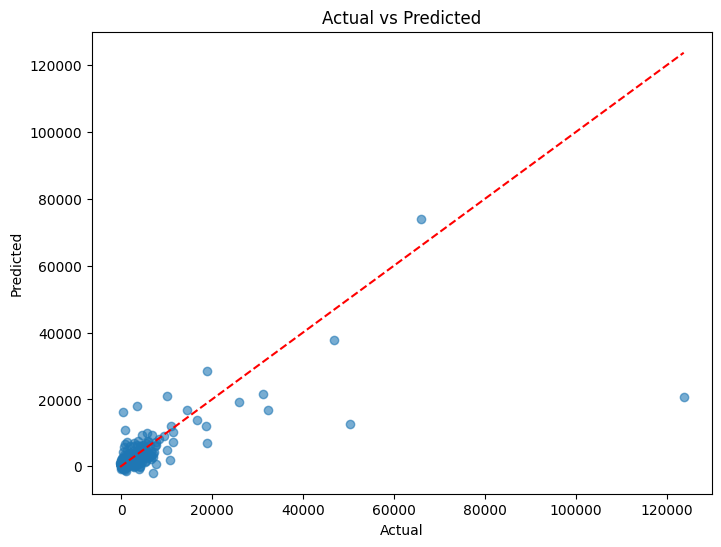

{'mae': 1374.4016893543997, 'rmse': 5166.441606337988, 'r2': 0.49461426851554313}
{'mae': 1530.5874709675281, 'rmse': 5236.7258003416155, 'r2': 0.48077021778447826}


In [87]:
print(linear_regression(rfm[['Recency','Frequency','Monetary','a','c']],y,graph=True))
print(linear_regression(rfm[['Recency','Frequency','Monetary','c','b','M_Score']],y))

In [67]:
print(linear_regression(X1,y))
print(linear_regression(X2,y))
print(linear_regression(rfm[['Recency','Frequency','Monetary']],y))

{'mae': 1358.5564604649167, 'rmse': 5347.401099671654, 'r2': 0.4585910283870941}
{'mae': 1320.5574764499274, 'rmse': 5330.966446153912, 'r2': 0.4619138371235133}
{'mae': 1320.557476449928, 'rmse': 5330.9664461539105, 'r2': 0.46191383712351364}


{'mae': 1516.6838601126824, 'rmse': 7872.3386393041765, 'r2': 0.6204096047814218}


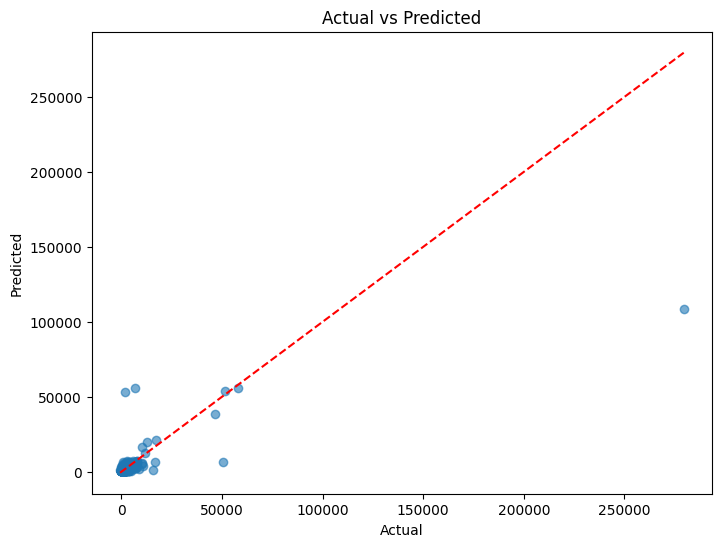

{'mae': 1491.3838460199117, 'rmse': 8278.62367801003, 'r2': 0.5802178550438939}


In [84]:
print(random_forest(rfm[['Recency','Frequency','Monetary','c']],y,150,5))
print(random_forest(rfm[['Recency','Frequency','Monetary','c','b','M_Score']],y,graph=True))

###  Actual vs Predicted Plot

The scatter plot above compares the **actual CLV values** (x-axis) to the **model's predicted CLV values** (y-axis).

- The **red dashed line** represents the ideal scenario where the predicted values exactly match the actual values (**y = x**).
- Points on the line mean perfect predictions.
- Points above the line indicate the model **overestimated** the CLV.
- Points below the line indicate the model **underestimated** the CLV.

This plot helps visualize how well the model is capturing the true spending behavior. Closer points to the line mean better predictive performance.


In [ ]:
print(random_forest(X1,y,60,8))
print(random_forest(X2,y,30,10))
print(random_forest(rfm[['Recency','Frequency','Monetary','c']],y))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define RF param grid
param_dist = {
    'n_estimators': [50,100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=2)

rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=2,
    n_jobs=-1
)
X=rfm[['Recency','Frequency','Monetary','c']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3,shuffle=False)
rand_search.fit(X_train, y_train)

print("Best RF Params:", rand_search.best_params_)
print("Best RF R2:", rand_search.best_score_)

best_rf = rand_search.best_estimator_

preds = rand_search.predict(X_test)
print(eval(y_test, preds))

{'mae': 1953.4859283263493, 'rmse': 11131.067912801178, 'r2': 0.24110560595847896}


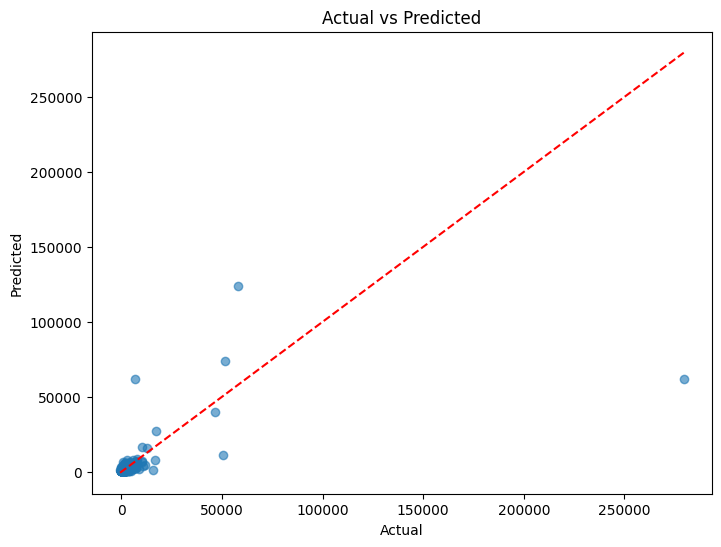

{'mae': 1653.3267938655658, 'rmse': 10303.510521411767, 'r2': 0.34975335877210656}


In [86]:
print(xgboost_regressor(X1,y,150,10,0.08))
print(xgboost_regressor(rfm[['Recency','Frequency','Monetary','a','b','c']],y,graph=True))


In this section, I experimented extensively with different feature combinations and additional derived features to improve model performance.

<li>I created new features (a, b, c) to capture potential interactions or non-linear effects between Recency, Frequency, and Monetary values.

<li>Multiple sets of features were tested with Linear Regression, Random Forest, and XGBoost, including adding or dropping RFM scores, custom ratios, and squares.

<li>Despite these transformations, the Random Forest provided the highest R² scores and the most stable results compared to other models.

<li>Linear Regression showed moderate performance but could not capture complex patterns beyond linear relationships.

<li>XGBoost performed worst for this dataset, even after tuning and custom feature engineering.</li>
<br>

This demonstrates that for this problem, simple non-linear models like Random Forest are more suitable than linear models or gradient boosting, given the data structure and available features.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_dist = {
    'n_estimators': [100, 150, 200, 300, 500],
    'max_depth': [7, 10, 15, 20 , 25, 30],
    'learning_rate': [0.03, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}


xgb = XGBRegressor(random_state=2)


rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,                
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=2,
    n_jobs=-1
)


X_train, X_test, y_train, y_test = train_test_split(
   X2 , y, test_size=0.2, random_state=2,shuffle=False
)
rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)

preds = rand_search.predict(X_test)
print(eval(y_test, preds))

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(200,150,100, 50,25),  
    activation='relu',             
    solver='adam',                 
    max_iter=2000,                 
    random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
        X1, y, test_size=0.2, random_state=2,shuffle=False)
mlp.fit(X_train, y_train)
preds = mlp.predict(X_test)

print(eval(y_test, preds))

To explore non-linear relationships in the data, I tested `MLPRegressor` from `sklearn.neural_network`.

- Used basic feed-forward layers.
- Tuned `hidden_layer_sizes`, `activation` functions, and `solver`.
- Monitored training convergence and overfitting.

However, the neural network did not significantly improve the R² over the best tree-based models.
This confirms that for this dataset, ensemble tree models (Random Forest) handle the patterns more effectively than a basic neural net.

In [ ]:
from catboost import CatBoostRegressor

X = rfm_encoded.drop(['Future_Monetary'], axis=1)
y = rfm_encoded['Future_Monetary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2,,shuffle=False
)

categorical_features = ['R_Score','F_Score','M_Score']

catboost_model = CatBoostRegressor(
    iterations=400,
    depth=6,
    learning_rate=0.05,
    random_seed=3,
    verbose=100
)

catboost_model.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_test, y_test)
)

preds = catboost_model.predict(X_test)
print(eval(y_test, preds))

<h4>Bagging different models</h4>

In [ ]:
X = rfm_encoded.drop(['Future_Monetary','R_Score','F_Score','M_Score'],axis=1
                    )
y = rfm_encoded['Future_Monetary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,,shuffle=False)

# Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=2)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# CatBoost
cat = CatBoostRegressor(iterations=400,depth=6,learning_rate=0.05,random_seed=2,verbose=100)
cat.fit(X_train, y_train)
cat_preds = cat.predict(X_test)

In [ ]:
ensemble_preds = (
    0.5 * rf_preds + 
    0.4 * lr_preds + 
    0.1 * cat_preds 
)
print(eval(y_test, ensemble_preds))

<h4>Testing best R^2 from the models contributing to bagging</h4>

In [ ]:
best_r2 = -999
best_weights = None

for w_rf in np.arange(0.5, 0.9, 0.05):  
    for w_lr in np.arange(0, 0.3, 0.05):
        for w_cat in np.arange(0, 0.3, 0.05):
                total = w_rf + w_lr + w_cat 
                if np.isclose(total, 1.0):
                    ensemble_preds = (
                        w_rf * rf_preds +
                        w_lr * lr_preds +
                        w_cat * cat_preds 
                    )
                    r2 = eval(y_test, ensemble_preds)['r2']
                    if r2 > best_r2:
                        best_r2 = r2
                        best_weights = (w_rf, w_lr, w_cat)

print(f"Best R2: {best_r2:.4f} with weights RF: {best_weights[0]}, LR: {best_weights[1]}, Cat: {best_weights[2]}")

<h4>Stacking models</h4>

In [ ]:
from sklearn.ensemble import StackingRegressor

base_learners = [
    ('rf', RandomForestRegressor(
        n_estimators=150, max_depth=5, random_state=2)),
    ('lr', LinearRegression()),
    ('cat', CatBoostRegressor(
        iterations=400,depth=6,learning_rate=0.05,random_seed=2,verbose=100))
]

meta_learner =  LinearRegression()
stacked_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
)

X = rfm[['Recency','Frequency','Monetary','a','b','c']]
y = rfm['Future_Monetary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
stacked_model.fit(X_train, y_train)
stacked_preds = stacked_model.predict(X_test)

print(eval(y_test, stacked_preds))

<h2>Conclusion</h2>
<br>
<li> After extensive feature engineering, testing, and hyperparameter tuning, the Random Forest Regressor consistently delivered the best performance, achieving an R² of ~0.59–0.63 on held-out test data.
<li> All other models and ensemble techniques performed worse than Random Forest for this dataset and problem.
<li> Additional features like average basket size, average spending, and unique products bought added some predictive power but only marginally improved the score.
<li> This suggests the available transaction-level data captures useful signals, but <b>further improvement may require additional customer realted data like behavioral or demographic data, time-based features, or more advanced time-series modeling.</b>
    <li> This project demonstrates CLV prediction, combining data cleaning, feature engineering, testing multiple models, and interpreting results.</li>